In [1]:
from notebooks.wandb_ds import *

gridsizes_ds = get_runs_as_dataset("gridsizes_16")

In [9]:
order = [(2, 2, 2), (3, 3, 3), (4, 4, 4), (5, 5, 5), (6, 6, 6), (7, 7, 7), (8, 8, 8), (9, 9, 9), (10, 10, 10)]
results = {"GOMEA": {x : None for x in order}, "GOMEA-partial": {x : None for x in order}}

for group, runs in gridsizes_ds.groupby(["OptimizerName", "MeshSize"]):
    it_times = runs[0].resolutions_train[0]["time[ms]"]
    if len(it_times) < 500:
        results[group[0]][group[1]] = it_times.mean() * 500
    else:
        results[group[0]][group[1]] = it_times.sum()

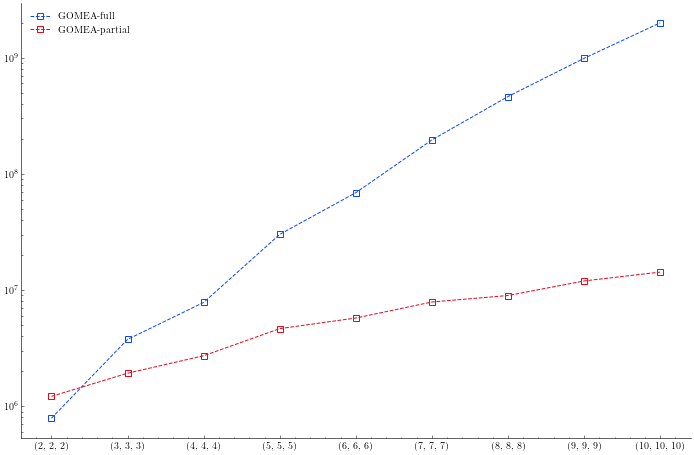

In [10]:
plt.figure(figsize=(12,8))
plt.plot(results["GOMEA"].values(), '--s', markerfacecolor='none', label="GOMEA-full")
plt.plot(results["GOMEA-partial"].values(),  '--s', markerfacecolor='none', label="GOMEA-partial")
plt.xticks([i for i in range(len(order))], order)
plt.yscale("log")
plt.legend()